In [1]:
import pandas as pd
import numpy as np

## 11.1 了解Python 和 Pandas 日期工具的區別

In [2]:
# 熟悉Python datetime
import datetime
date = datetime.date(year=2022, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year=2022, month=6, day=7,
                       hour=12, minute=30, second=19, microsecond=463198)

print(f'date is {date}')
print(f'time is {time}')
print(f'datetime is {dt}')

date is 2022-06-07
time is 12:30:19.463198
datetime is 2022-06-07 12:30:19.463198


In [ ]:
# timedelta 物件
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, seconds=6.73,
                        milliseconds=99, microseconds=8)

print(td)

19 days, 10:20:06.829008


In [4]:
# date 與 datetime 可以與 timedelta 進行運算
print(f'new data is {date+td}')
print(f'new datatime is {dt+td}')

new data is 2022-06-26
new datatime is 2022-06-26 22:50:26.292206


In [5]:
# pd.Timestamp
print(pd.Timestamp(year=2021, month=12, day=21, hour=5, minute=10, second=8,
             microsecond=99))
print(pd.Timestamp('2016/1/10'))
print(pd.Timestamp('2014-5/10'))
print(pd.Timestamp('Jan 3, 2019 20:45.56'))
print(pd.Timestamp('2016-01-05T05:34:43.123456789'))


2021-12-21 05:10:08.000099
2016-01-10 00:00:00
2014-05-10 00:00:00
2019-01-03 20:45:33
2016-01-05 05:34:43.123456789


In [ ]:
# 傳入數值 預設單位是毫微秒
print(pd.Timestamp(500))

# 指定單位為日
print(pd.Timestamp(500, unit='D'))

1970-01-01 00:00:00.000000500
1971-05-16 00:00:00


In [7]:
# to_datetime()
print(pd.to_datetime('2015-5-13'))
print(pd.to_datetime('2015-13-5', dayfirst=True))

# 還可以使用格式指令 讓pandas 理解自訂的日期時間格式
print(pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:20 pm',
                      format='Start Date: %b %d, %Y Start Time: %I:%M %p'))


2015-05-13 00:00:00
2015-05-13 00:00:00
2017-09-30 13:20:00


In [9]:
# 可以指定起始日期
print(pd.to_datetime(100, unit='D', origin='2013-1-1'))

2013-04-11 00:00:00


In [13]:
# 輸入Series
s = pd.Series([10, 100, 1000, 10000])
print(pd.to_datetime(s, unit='D'))
s = pd.Series(['12-5-2015', '14-1-2013', '20-12-2017', '40/23/2017'])
print(pd.to_datetime(s, dayfirst=True, errors='coerce'))

print(pd.to_datetime(['Aug 3 1999 3:45:56', '31-10-2017'], format='mixed'))

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]
0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]
DatetimeIndex(['1999-08-03 03:45:56', '2017-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)


In [15]:
# pd.Timedelta to_timedelta()
print(pd.Timedelta('12 days 5 hours 3 minutes 1234567890 nanoseconds'))

print(pd.Timedelta(days=5, minutes=7.34))

print(pd.Timedelta(100, unit='W'))

print(pd.to_timedelta('67:15:45.454'))

s = pd.Series([10, 100])
print(pd.to_timedelta(s, unit='s'))

12 days 05:03:01.234567890
5 days 00:07:20.400000
700 days 00:00:00
2 days 19:15:45.454000
0   0 days 00:00:10
1   0 days 00:01:40
dtype: timedelta64[ns]


In [16]:
# timestamp 與 timedelta 運算
print(pd.Timestamp('1/1/2022') + pd.Timedelta('12 days 5 hours 3 minutes') * 2)

td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
print(td1 + td2)

print(pd.Timedelta('12 days') / pd.Timedelta('3 days'))

2022-01-25 10:06:00
TimedeltaIndex(['0 days 03:00:10', '0 days 04:01:40'], dtype='timedelta64[ns]', freq=None)
4.0


In [17]:
# 檢視可用屬性與方法
ts = pd.Timestamp('2021-10-1 4:23:23.9')
# 進位至小時
print(ts.ceil('h'))

# 取得屬性資訊
print(ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second)

# 星期 一年中第幾天 所在月份的天數
print(ts.dayofweek, ts.dayofyear, ts.daysinmonth)

# 轉換為python datetime物件
print(ts.to_pydatetime())

# 建立Timedelta 物件 近似到分鐘
td = pd.Timedelta(125.8723, unit='h')
print(td.round('min'))

# 檢視個別元素
print(td.components)

# 計算總秒數
print(td.total_seconds())

2021-10-01 05:00:00
2021 10 1 4 23 23
4 274 31
2021-10-01 04:23:23.900000
5 days 05:52:00
Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)
453140.28


## 11.2 對時間序列切片

In [26]:
# 載入資料集
crime = pd.read_hdf('../../data/crime.h5', 'crime')
print(crime.dtypes)

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object


In [27]:
# 將日期欄位設成索引
crime = crime.set_index('REPORTED_DATE')
print(crime)

                                  OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  \
REPORTED_DATE                                                           
2014-06-29 02:01:00     traffic-accident-dui-duid    traffic-accident   
2014-06-29 01:54:00    vehicular-eluding-no-chase    all-other-crimes   
2014-06-29 02:00:00          disturbing-the-peace     public-disorder   
2014-06-29 02:18:00                        curfew     public-disorder   
2014-06-29 04:17:00            aggravated-assault  aggravated-assault   
...                                           ...                 ...   
2017-09-13 05:48:00    burglary-business-by-force            burglary   
2017-09-12 20:37:00  weapon-unlawful-discharge-of    all-other-crimes   
2017-09-12 16:32:00        traf-habitual-offender    all-other-crimes   
2017-09-12 13:04:00       criminal-mischief-other     public-disorder   
2017-09-12 09:30:00                   theft-other             larceny   

                        GEO_LON    GEO_LAT        

In [28]:
# 只填入日期
print(crime.loc['2016-05-12'])


                             OFFENSE_TYPE_ID           OFFENSE_CATEGORY_ID  \
REPORTED_DATE                                                                
2016-05-12 23:51:00  criminal-mischief-other               public-disorder   
2016-05-12 18:40:00        liquor-possession                  drug-alcohol   
2016-05-12 22:26:00         traffic-accident              traffic-accident   
2016-05-12 20:35:00            theft-bicycle                       larceny   
2016-05-12 09:39:00   theft-of-motor-vehicle                    auto-theft   
...                                      ...                           ...   
2016-05-12 17:55:00       public-peace-other               public-disorder   
2016-05-12 19:24:00        threats-to-injure               public-disorder   
2016-05-12 22:28:00            sex-aslt-rape                sexual-assault   
2016-05-12 15:59:00   menacing-felony-w-weap            aggravated-assault   
2016-05-12 16:39:00               assault-dv  other-crimes-again

In [29]:
# 也可以指定到月 甚至是年
print(crime.loc['2016-05'].shape)
print(crime.loc['2016'].shape)

(8012, 7)
(91076, 7)


In [31]:
# 還可以用月份名稱或字串 都可以自動轉換
print(crime.loc['Dec 2015'].shape)
print(crime.loc['21st October 2014 05'].shape)

(6907, 7)
(4, 7)


In [32]:
# 時間索引切片
crime = crime.sort_index()

print(crime.loc['2015-3-4 22':'2016-1-1 11:22:00'])

                                  OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  \
REPORTED_DATE                                                           
2015-03-04 22:25:00  traffic-accident-hit-and-run    traffic-accident   
2015-03-04 22:30:00              traffic-accident    traffic-accident   
2015-03-04 22:32:00  traffic-accident-hit-and-run    traffic-accident   
2015-03-04 22:33:00  traffic-accident-hit-and-run    traffic-accident   
2015-03-04 22:36:00       theft-unauth-use-of-ftd  white-collar-crime   
...                                           ...                 ...   
2016-01-01 11:10:00        theft-of-motor-vehicle          auto-theft   
2016-01-01 11:11:00              traffic-accident    traffic-accident   
2016-01-01 11:11:00  traffic-accident-hit-and-run    traffic-accident   
2016-01-01 11:16:00                    traf-other    all-other-crimes   
2016-01-01 11:22:00              traffic-accident    traffic-accident   

                        GEO_LON    GEO_LAT       N

## 11.3 過濾包含時間資料的欄位

In [3]:
# 載入資料集
crime = pd.read_hdf('../../data/crime.h5', 'crime')
print(crime.dtypes)

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object


In [5]:
# 用== 無法用日期搜尋
print(crime[crime.REPORTED_DATE == '2016-05-12'])

Empty DataFrame
Columns: [OFFENSE_TYPE_ID, OFFENSE_CATEGORY_ID, REPORTED_DATE, GEO_LON, GEO_LAT, NEIGHBORHOOD_ID, IS_CRIME, IS_TRAFFIC]
Index: []


In [4]:
# 使用between 選取
print(crime[crime.REPORTED_DATE.between(left='2016-05-12', right='2016-05-13')])

                OFFENSE_TYPE_ID           OFFENSE_CATEGORY_ID  \
295715  criminal-mischief-other               public-disorder   
296474        liquor-possession                  drug-alcohol   
297204         traffic-accident              traffic-accident   
299383            theft-bicycle                       larceny   
299389   theft-of-motor-vehicle                    auto-theft   
...                         ...                           ...   
358208       public-peace-other               public-disorder   
358448        threats-to-injure               public-disorder   
363134            sex-aslt-rape                sexual-assault   
365959   menacing-felony-w-weap            aggravated-assault   
378711               assault-dv  other-crimes-against-persons   

             REPORTED_DATE     GEO_LON    GEO_LAT      NEIGHBORHOOD_ID  \
295715 2016-05-12 23:51:00 -105.017241  39.705845          athmar-park   
296474 2016-05-12 18:40:00 -104.995692  39.747875                  cbd 

In [6]:
# 用between 切片
print(crime[crime.REPORTED_DATE.between('2016-05', '2016-06')].shape)

print(crime[crime.REPORTED_DATE.between('2015', '2016')].shape)

(8012, 8)
(89148, 8)


## 11.4 僅適用於DatetimeIndex 的方法

In [2]:
# 載入資料集
crime = pd.read_hdf('../../data/crime.h5', 'crime').set_index('REPORTED_DATE')
type(crime.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
# 選取2-5 A.M.
print(crime.between_time('2:00', '5:00'))

                                    OFFENSE_TYPE_ID  \
REPORTED_DATE                                         
2014-06-29 02:01:00       traffic-accident-dui-duid   
2014-06-29 02:00:00            disturbing-the-peace   
2014-06-29 02:18:00                          curfew   
2014-06-29 04:17:00              aggravated-assault   
2014-06-29 04:22:00  violation-of-restraining-order   
...                                             ...   
2017-08-25 04:41:00        theft-items-from-vehicle   
2017-09-13 04:17:00          theft-of-motor-vehicle   
2017-09-13 02:21:00                  assault-simple   
2017-09-13 03:21:00       traffic-accident-dui-duid   
2017-09-13 02:15:00    traffic-accident-hit-and-run   

                              OFFENSE_CATEGORY_ID     GEO_LON    GEO_LAT  \
REPORTED_DATE                                                              
2014-06-29 02:01:00              traffic-accident -105.000149  39.745753   
2014-06-29 02:00:00               public-disorder -105.0

In [7]:
# 選取特定時間點
print(crime.at_time('5:47'))

                                  OFFENSE_TYPE_ID       OFFENSE_CATEGORY_ID  \
REPORTED_DATE                                                                 
2013-11-26 05:47:00       criminal-mischief-other           public-disorder   
2017-04-09 05:47:00     criminal-mischief-mtr-veh           public-disorder   
2017-02-19 05:47:00       criminal-mischief-other           public-disorder   
2017-02-16 05:47:00            aggravated-assault        aggravated-assault   
2017-02-12 05:47:00           police-interference          all-other-crimes   
...                                           ...                       ...   
2013-09-10 05:47:00              traffic-accident          traffic-accident   
2013-03-14 05:47:00                   theft-other                   larceny   
2012-10-08 05:47:00      theft-items-from-vehicle  theft-from-motor-vehicle   
2013-08-21 05:47:00      theft-items-from-vehicle  theft-from-motor-vehicle   
2017-08-23 05:47:00  traffic-accident-hit-and-run   

In [9]:
# 選取前6個月的資料
crime_sort = crime.sort_index()
print(crime_sort.first(offset=pd.offsets.MonthBegin(6)))

                                    OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  \
REPORTED_DATE                                                             
2012-01-02 00:06:00              aggravated-assault  aggravated-assault   
2012-01-02 00:06:00  violation-of-restraining-order    all-other-crimes   
2012-01-02 00:16:00       traffic-accident-dui-duid    traffic-accident   
2012-01-02 00:47:00                traffic-accident    traffic-accident   
2012-01-02 01:35:00              aggravated-assault  aggravated-assault   
...                                             ...                 ...   
2012-06-30 23:40:00       traffic-accident-dui-duid    traffic-accident   
2012-06-30 23:44:00                traffic-accident    traffic-accident   
2012-06-30 23:50:00       criminal-mischief-mtr-veh     public-disorder   
2012-06-30 23:54:00    traffic-accident-hit-and-run    traffic-accident   
2012-07-01 00:01:00                  robbery-street             robbery   

                        

C:\Users\coffi\AppData\Local\Temp\ipykernel_2852\2534242546.py:3: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  print(crime_sort.first(offset=pd.offsets.MonthBegin(6)))


In [10]:
# 改用MonthEnd
print(crime_sort.first(offset=pd.offsets.MonthEnd(6)))

                                    OFFENSE_TYPE_ID  \
REPORTED_DATE                                         
2012-01-02 00:06:00              aggravated-assault   
2012-01-02 00:06:00  violation-of-restraining-order   
2012-01-02 00:16:00       traffic-accident-dui-duid   
2012-01-02 00:47:00                traffic-accident   
2012-01-02 01:35:00              aggravated-assault   
...                                             ...   
2012-06-29 23:01:00              aggravated-assault   
2012-06-29 23:11:00                traffic-accident   
2012-06-29 23:41:00                  robbery-street   
2012-06-29 23:57:00                  assault-simple   
2012-06-30 00:04:00                traffic-accident   

                              OFFENSE_CATEGORY_ID     GEO_LON    GEO_LAT  \
REPORTED_DATE                                                              
2012-01-02 00:06:00            aggravated-assault -104.816860  39.796717   
2012-01-02 00:06:00              all-other-crimes -104.8

C:\Users\coffi\AppData\Local\Temp\ipykernel_2852\2263777660.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  print(crime_sort.first(offset=pd.offsets.MonthEnd(6)))


In [ ]:
# 使用normalize 參數
print(crime_sort.first(offset=pd.offsets.MonthBegin(6, normalize=True)))

                                    OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  \
REPORTED_DATE                                                             
2012-01-02 00:06:00              aggravated-assault  aggravated-assault   
2012-01-02 00:06:00  violation-of-restraining-order    all-other-crimes   
2012-01-02 00:16:00       traffic-accident-dui-duid    traffic-accident   
2012-01-02 00:47:00                traffic-accident    traffic-accident   
2012-01-02 01:35:00              aggravated-assault  aggravated-assault   
...                                             ...                 ...   
2012-06-30 23:40:00    traffic-accident-hit-and-run    traffic-accident   
2012-06-30 23:40:00       traffic-accident-dui-duid    traffic-accident   
2012-06-30 23:44:00                traffic-accident    traffic-accident   
2012-06-30 23:50:00       criminal-mischief-mtr-veh     public-disorder   
2012-06-30 23:54:00    traffic-accident-hit-and-run    traffic-accident   

                        

C:\Users\coffi\AppData\Local\Temp\ipykernel_2852\2541294236.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  print(crime_sort.first(offset=pd.offsets.MonthBegin(6, normalize=True)))


In [12]:
# 用loc
print(crime_sort.loc[:'2012-06'])

                                    OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  \
REPORTED_DATE                                                             
2012-01-02 00:06:00              aggravated-assault  aggravated-assault   
2012-01-02 00:06:00  violation-of-restraining-order    all-other-crimes   
2012-01-02 00:16:00       traffic-accident-dui-duid    traffic-accident   
2012-01-02 00:47:00                traffic-accident    traffic-accident   
2012-01-02 01:35:00              aggravated-assault  aggravated-assault   
...                                             ...                 ...   
2012-06-30 23:40:00    traffic-accident-hit-and-run    traffic-accident   
2012-06-30 23:40:00       traffic-accident-dui-duid    traffic-accident   
2012-06-30 23:44:00                traffic-accident    traffic-accident   
2012-06-30 23:50:00       criminal-mischief-mtr-veh     public-disorder   
2012-06-30 23:54:00    traffic-accident-hit-and-run    traffic-accident   

                        

In [14]:
# 自訂偏移量
dt = pd.Timestamp('2012-1-16 13:30')
dt + pd.DateOffset(months=1)

Timestamp('2012-02-16 13:30:00')

## 11.5 依據時間區段重新分組

In [16]:
# 載入資料集
crime_sort = (pd.read_hdf('../../data/crime.h5', 'crime')
                    .set_index('REPORTED_DATE')
                    .sort_index()
)

In [17]:
# 以周為單位分組
print(crime_sort.resample('W'))

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [18]:
# 每周案件量
print(crime_sort.resample('W').size())

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64


In [19]:
# 改成以週四做為結束日
print(crime_sort.resample('W-THU').size())

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64


In [20]:
# 用groupby 做出一樣的效果
weekly_crimes = (crime_sort.groupby(pd.Grouper(freq='W')).size())
print(weekly_crimes)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64


In [ ]:
# resample() 的屬性與方法 (不顯示特殊方法)
r = crime_sort.resample('W')
[attr for attr in dir(r) if attr[0].islower()]

['agg',
 'aggregate',
 'apply',
 'asfreq',
 'ax',
 'bfill',
 'binner',
 'count',
 'ffill',
 'fillna',
 'first',
 'get_group',
 'groups',
 'include_groups',
 'indices',
 'interpolate',
 'kind',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'nearest',
 'ngroups',
 'nunique',
 'ohlc',
 'pipe',
 'prod',
 'quantile',
 'sem',
 'size',
 'std',
 'sum',
 'transform',
 'var']

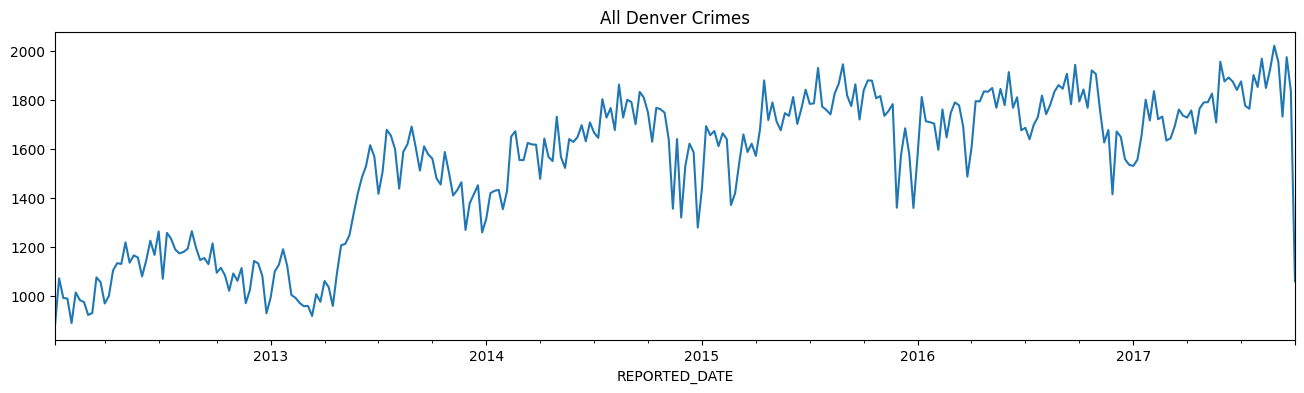

In [22]:
# 畫個折線圖
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 4))
weekly_crimes.plot(title='All Denver Crimes', ax=ax);

## 11.6 分組彙總同一時間單位的多個欄位

In [24]:
# 載入資料集
crime = (pd.read_hdf('../../data/crime.h5', 'crime')
                    .set_index('REPORTED_DATE')
                    .sort_index())

In [26]:
# 直接用resample 求出犯罪與交通事故季度總數
print(crime
        .resample('QE')
        ['IS_CRIME', 'IS_TRAFFIC']
        .sum())

               IS_CRIME  IS_TRAFFIC
REPORTED_DATE                      
2012-03-31         7882        4726
2012-06-30         9641        5255
2012-09-30        10566        5003
2012-12-31         9197        4802
2013-03-31         8730        4442
2013-06-30        12259        4510
2013-09-30        15799        4942
2013-12-31        13910        4968
2014-03-31        14487        5021
2014-06-30        15833        5225
2014-09-30        17342        5734
2014-12-31        15028        5783
2015-03-31        14989        5380
2015-06-30        16924        5825
2015-09-30        17891        5988
2015-12-31        16090        6117
2016-03-31        16423        5590
2016-06-30        17547        5861
2016-09-30        17427        6199
2016-12-31        15984        6094
2017-03-31        16426        5587
2017-06-30        17486        6148
2017-09-30        17990        6101


In [28]:
# 索引改為起始日
print(crime
        .resample('QS')
        ['IS_CRIME', 'IS_TRAFFIC']
        .sum())

               IS_CRIME  IS_TRAFFIC
REPORTED_DATE                      
2012-01-01         7882        4726
2012-04-01         9641        5255
2012-07-01        10566        5003
2012-10-01         9197        4802
2013-01-01         8730        4442
2013-04-01        12259        4510
2013-07-01        15799        4942
2013-10-01        13910        4968
2014-01-01        14487        5021
2014-04-01        15833        5225
2014-07-01        17342        5734
2014-10-01        15028        5783
2015-01-01        14989        5380
2015-04-01        16924        5825
2015-07-01        17891        5988
2015-10-01        16090        6117
2016-01-01        16423        5590
2016-04-01        17547        5861
2016-07-01        17427        6199
2016-10-01        15984        6094
2017-01-01        16426        5587
2017-04-01        17486        6148
2017-07-01        17990        6101


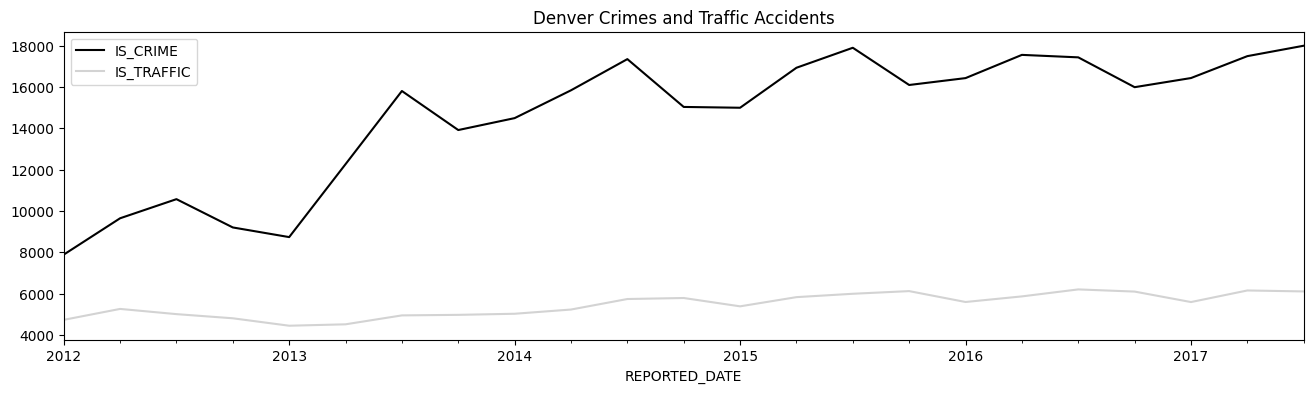

In [32]:
# 畫折線圖比較
fig, ax = plt.subplots(figsize=(16, 4))
(crime.groupby(pd.Grouper(freq='QE'))
      [['IS_CRIME', 'IS_TRAFFIC']]
      .sum()
      .plot(color=['black', 'lightgrey'], ax=ax,
            title='Denver Crimes and Traffic Accidents'));

In [34]:
# 讓季度從三月開始
print(crime
        .resample('QS-MAR')
        ['IS_CRIME', 'IS_TRAFFIC']
        .sum())

               IS_CRIME  IS_TRAFFIC
REPORTED_DATE                      
2011-12-01         5013        3198
2012-03-01         9260        4954
2012-06-01        10524        5190
2012-09-01         9450        4777
2012-12-01         9003        4652
2013-03-01         9953        4461
2013-06-01        15792        4797
2013-09-01        14588        4915
2013-12-01        13538        5030
2014-03-01        15794        5131
2014-06-01        17041        5550
2014-09-01        15946        5813
2014-12-01        14395        5626
2015-03-01        16599        5517
2015-06-01        17833        6011
2015-09-01        16865        6158
2015-12-01        15874        5652
2016-03-01        17362        5777
2016-06-01        17225        6042
2016-09-01        16932        6202
2016-12-01        15615        5731
2017-03-01        17287        5940
2017-06-01        18545        6246
2017-09-01         5417        1931


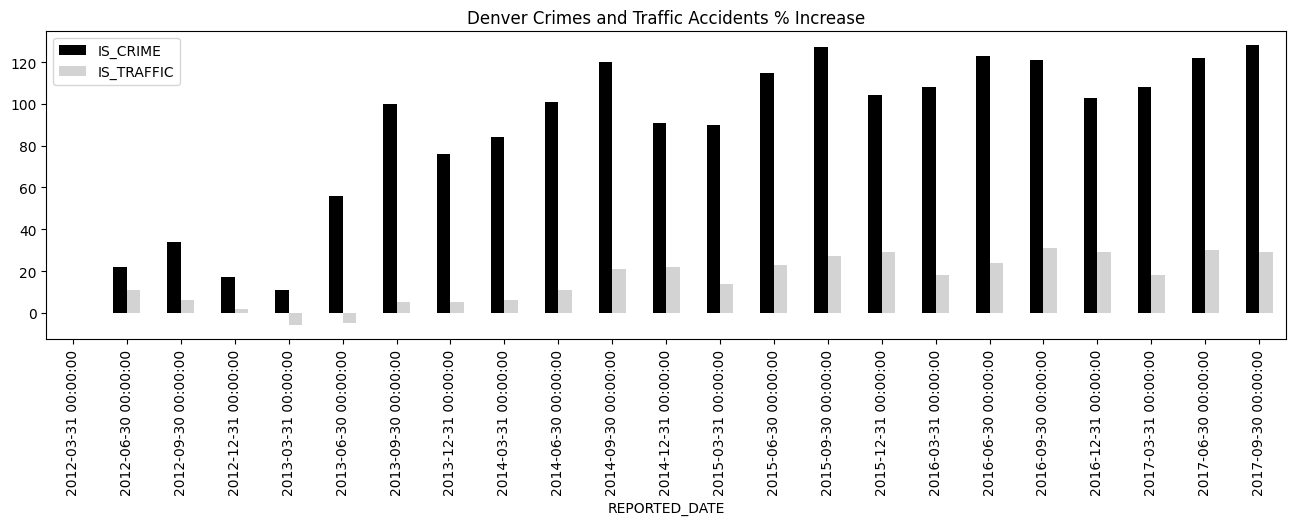

In [36]:
# 成長率的並列長條圖
crime_begin = (crime.resample('QE')
                    ['IS_CRIME', 'IS_TRAFFIC']
                    .sum()
                    .iloc[0])

fig, ax = plt.subplots(figsize=(16, 4))
(crime.resample('QE')
       ['IS_CRIME', 'IS_TRAFFIC']
      .sum()
      .div(crime_begin)
      .sub(1)
      .round(2)
      .mul(100)
      .plot.bar(color=['black', 'lightgrey'], ax=ax,
                title='Denver Crimes and Traffic Accidents % Increase'));

## 11.7 案例演練: 以星期幾來統計犯罪率

In [37]:
# 載入資料集
crime = pd.read_hdf('../../data/crime.h5', 'crime')
print(crime)

                     OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID       REPORTED_DATE  \
0          traffic-accident-dui-duid    traffic-accident 2014-06-29 02:01:00   
1         vehicular-eluding-no-chase    all-other-crimes 2014-06-29 01:54:00   
2               disturbing-the-peace     public-disorder 2014-06-29 02:00:00   
3                             curfew     public-disorder 2014-06-29 02:18:00   
4                 aggravated-assault  aggravated-assault 2014-06-29 04:17:00   
...                              ...                 ...                 ...   
460906    burglary-business-by-force            burglary 2017-09-13 05:48:00   
460907  weapon-unlawful-discharge-of    all-other-crimes 2017-09-12 20:37:00   
460908        traf-habitual-offender    all-other-crimes 2017-09-12 16:32:00   
460909       criminal-mischief-other     public-disorder 2017-09-12 13:04:00   
460910                   theft-other             larceny 2017-09-12 09:30:00   

           GEO_LON    GEO_LAT          

In [38]:
# 找出各星期彙總
print(crime['REPORTED_DATE']
           .dt.day_name()
           .value_counts())

REPORTED_DATE
Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: count, dtype: int64


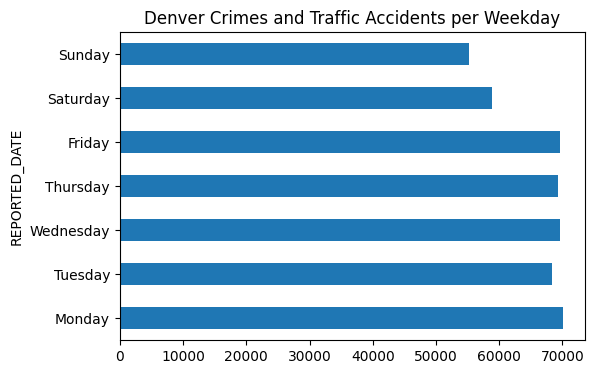

In [40]:
# 畫水平長條圖
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

title = 'Denver Crimes and Traffic Accidents per Weekday'

fig, ax = plt.subplots(figsize=(6, 4))
(crime['REPORTED_DATE'].dt.day_name()
                       .value_counts()
                       .reindex(days)
                       .plot.barh(title=title, ax=ax));

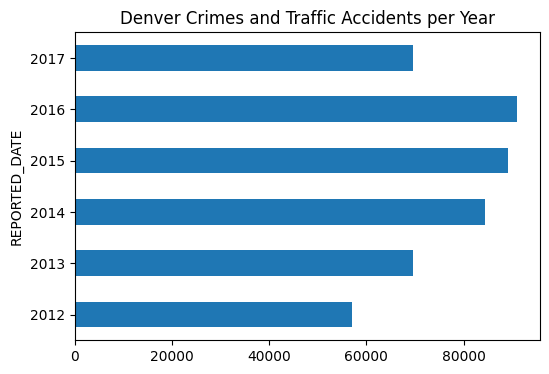

In [41]:
# 也可以依照年分
title = 'Denver Crimes and Traffic Accidents per Year'

fig, ax = plt.subplots(figsize=(6, 4))
(crime['REPORTED_DATE'].dt.year
                       .value_counts()
                       .sort_index()
                       .plot.barh(title=title, ax=ax));

In [42]:
# 每年中的各星期
print(crime
        .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
                  crime['REPORTED_DATE'].dt.day_name().rename('day')])
        .size())

year  day      
2012  Friday        8549
      Monday        8786
      Saturday      7442
      Sunday        7189
      Thursday      8440
      Tuesday       8191
      Wednesday     8440
2013  Friday       10380
      Monday       10627
      Saturday      8875
      Sunday        8444
      Thursday     10431
      Tuesday      10416
      Wednesday    10354
2014  Friday       12683
      Monday       12813
      Saturday     10950
      Sunday       10278
      Thursday     12309
      Tuesday      12440
      Wednesday    12948
2015  Friday       13273
      Monday       13452
      Saturday     11586
      Sunday       10624
      Thursday     13512
      Tuesday      13381
      Wednesday    13320
2016  Friday       14059
      Monday       13708
      Saturday     11467
      Sunday       10554
      Thursday     14050
      Tuesday      13338
      Wednesday    13900
2017  Friday       10677
      Monday       10638
      Saturday      8514
      Sunday        8124
      Thu

In [43]:
# unstack 來比較
print(crime
        .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
                  crime['REPORTED_DATE'].dt.day_name().rename('day')])
        .size()
        .unstack('day'))

day   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
year                                                                
2012    8549    8786      7442    7189      8440     8191       8440
2013   10380   10627      8875    8444     10431    10416      10354
2014   12683   12813     10950   10278     12309    12440      12948
2015   13273   13452     11586   10624     13512    13381      13320
2016   14059   13708     11467   10554     14050    13338      13900
2017   10677   10638      8514    8124     10545    10628      10576


In [44]:
# 使用crosstab
print(crime
        .assign(year = crime.REPORTED_DATE.dt.year,
                day = crime.REPORTED_DATE.dt.day_name())
        .pipe(lambda df_:pd.crosstab(df_.year, df_.day))
)

day   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
year                                                                
2012    8549    8786      7442    7189      8440     8191       8440
2013   10380   10627      8875    8444     10431    10416      10354
2014   12683   12813     10950   10278     12309    12440      12948
2015   13273   13452     11586   10624     13512    13381      13320
2016   14059   13708     11467   10554     14050    13338      13900
2017   10677   10638      8514    8124     10545    10628      10576


In [53]:
# 2017的紀錄天數
criteria = crime['REPORTED_DATE'].dt.year == 2017
print(crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max())

272


In [55]:
# 計算前272天的中位數
crime_pct = (crime
                ['REPORTED_DATE']
                .dt.dayofyear.le(272)
                .groupby(crime.REPORTED_DATE.dt.year)
                .mean()
                .round(3))

print(crime_pct.loc[2012:2016].median())

0.748


In [ ]:
# 用佔比中位數去推測2017 的紀錄
def update_2017(df_):
    df_.loc[2017] = (df_.loc[2017]
                        .div(.748)
                        .astype('int'))
    return df_

print(crime
        .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
                  crime['REPORTED_DATE'].dt.day_name().rename('day')])
        .size()
        .unstack('day')
        .pipe(update_2017)
        .reindex(columns=days))

day   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
year                                                                
2012    8786     8191       8440      8440    8549      7442    7189
2013   10627    10416      10354     10431   10380      8875    8444
2014   12813    12440      12948     12309   12683     10950   10278
2015   13452    13381      13320     13512   13273     11586   10624
2016   13708    13338      13900     14050   14059     11467   10554
2017   14221    14208      14139     14097   14274     11382   10860


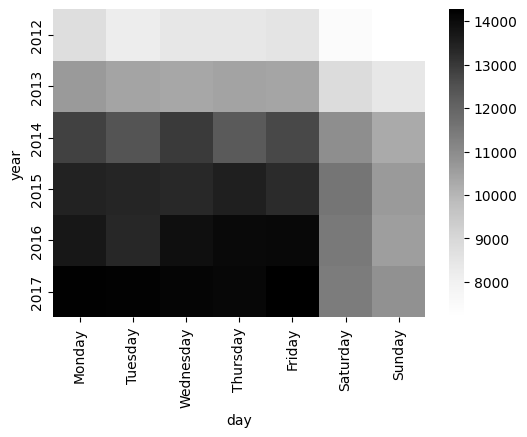

In [58]:
# 用seaborn 呈現熱力圖
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
table = (crime
        .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
                  crime['REPORTED_DATE'].dt.day_name().rename('day')])
        .size()
        .unstack('day')
        .pipe(update_2017)
        .reindex(columns=days))
sns.heatmap(table, cmap='Greys', ax=ax);

In [59]:
# 載入人口數資料集
denver_pop = pd.read_csv('../../data/denver_pop.csv', index_col='Year')
print(denver_pop)

      Population
Year            
2017      705000
2016      693000
2015      680000
2014      662000
2013      647000
2012      634000


In [60]:
# 通常犯罪率的分母是每100000人為單位
den_100K = denver_pop.div(100_000).squeeze()
print(den_100K)

Year
2017    7.05
2016    6.93
2015    6.80
2014    6.62
2013    6.47
2012    6.34
Name: Population, dtype: float64


In [62]:
# 對齊索引
normalized = (crime
                .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
                        crime['REPORTED_DATE'].dt.day_name().rename('day')])
                .size()
                .unstack('day')
                .pipe(update_2017)
                .reindex(columns=days)
                .div(den_100K, axis='index')
                .astype(int))

print(normalized)

day   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
2012    1385     1291       1331      1331    1348      1173    1133
2013    1642     1609       1600      1612    1604      1371    1305
2014    1935     1879       1955      1859    1915      1654    1552
2015    1978     1967       1958      1987    1951      1703    1562
2016    1978     1924       2005      2027    2028      1654    1522
2017    2017     2015       2005      1999    2024      1614    1540


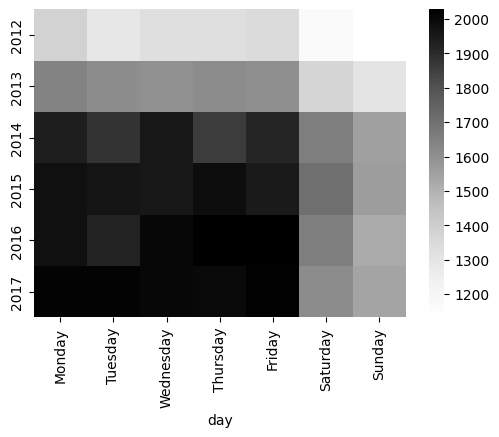

In [64]:
# 再次畫熱力圖
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(normalized, cmap='Greys', ax=ax);

In [65]:
# 查看特定犯罪類型
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

crime_type = 'auto-theft'

normalized = (crime
                .query('OFFENSE_CATEGORY_ID == @crime_type')
                .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
                        crime['REPORTED_DATE'].dt.day_name().rename('day')])
                .size()
                .unstack('day')
                .pipe(update_2017)
                .reindex(columns=days)
                .div(den_100K, axis='index')
                .astype(int))

print(normalized)

day   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
2012      95       72         72        76      71        78      76
2013      85       74         74        69      65        68      67
2014      94       76         72        70      76        67      67
2015     108      102         89       101      92        85      78
2016     119      102        100        99      97        86      85
2017     114      118        111       106     111        91     102


## 11.8 使用匿名函式來分組

In [2]:
# 載入資料集
crime = (pd.read_hdf('../../data/crime.h5', 'crime')
                    .set_index('REPORTED_DATE')
                    .sort_index())

In [3]:
# 用index 取得每星期的資訊
print(crime.index.day_name().value_counts())

REPORTED_DATE
Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: count, dtype: int64


In [6]:
# groupby 可以傳入函式
print(crime.groupby(lambda idx: idx.day_name())
            [['IS_CRIME', 'IS_TRAFFIC']]
            .sum())

               IS_CRIME  IS_TRAFFIC
REPORTED_DATE                      
Friday            48833       20814
Monday            52158       17895
Saturday          43363       15516
Sunday            42315       12968
Thursday          49470       19845
Tuesday           49658       18755
Wednesday         50054       19508


In [7]:
# 函式可以是多個條件
funcs = [lambda idx: idx.round('2h').hour, lambda idx: idx.year]

print(crime.groupby(funcs)
            [['IS_CRIME', 'IS_TRAFFIC']]
            .sum()
            .unstack())

              IS_CRIME                               IS_TRAFFIC              \
REPORTED_DATE     2012  2013  2014  2015  2016  2017       2012  2013  2014   
REPORTED_DATE                                                                 
0                 2422  4040  5649  5649  5377  3811        919   792   978   
2                 1888  3214  4245  4050  4091  3041        718   652   779   
4                 1472  2181  2956  2959  3044  2255        399   378   424   
6                 1067  1365  1750  2167  2108  1567        411   399   479   
8                 2998  3445  3727  4161  4488  3251       1957  1955  2210   
10                4305  5035  5658  6205  6218  4993       1979  1901  2139   
12                4496  5524  6434  6841  7226  5463       2200  2138  2379   
14                4266  5698  6708  7218  6896  5396       2241  2245  2630   
16                4113  5889  7351  7643  7926  6338       2714  2562  3002   
18                3660  5094  6586  7015  7407  6157

In [9]:
# highlight 重點
(crime.groupby(funcs)
        [['IS_CRIME', 'IS_TRAFFIC']]
        .sum()
        .unstack()
        .style.highlight_max(color='grey'))

## 11.9 使用Timestamp 與另一欄位來分組

In [10]:
# 載入資料集
employee = pd.read_csv('../../data/employee.csv',
                       parse_dates=['JOB_DATE', 'HIRE_DATE'],
                       index_col='HIRE_DATE')

print(employee)

            UNIQUE_ID               POSITION_TITLE  \
HIRE_DATE                                            
2006-06-12          0  ASSISTANT DIRECTOR (EX LVL)   
2000-07-19          1            LIBRARY ASSISTANT   
2015-02-03          2               POLICE OFFICER   
1982-02-08          3            ENGINEER/OPERATOR   
1989-06-19          4                  ELECTRICIAN   
...               ...                          ...   
2014-06-09       1995               POLICE OFFICER   
2003-09-02       1996       COMMUNICATIONS CAPTAIN   
2014-10-13       1997               POLICE OFFICER   
2009-01-20       1998               POLICE OFFICER   
2009-01-12       1999                 FIRE FIGHTER   

                               DEPARTMENT  BASE_SALARY  \
HIRE_DATE                                                
2006-06-12    Municipal Courts Department     121862.0   
2000-07-19                        Library      26125.0   
2015-02-03  Houston Police Department-HPD      45279.0   
1982-02

In [11]:
# 可以找出不同性別的均薪
print(employee
        .groupby('GENDER')
        ['BASE_SALARY']
        .mean()
        .round(-2))

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64


In [13]:
# 以10年為單位分組計算均薪
print(employee
        .resample('10YS')
        ['BASE_SALARY']
        .mean()
        .round(-2))

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10YS-JAN, Name: BASE_SALARY, dtype: float64


In [14]:
# 合起來可以對性別與年份分組
print(employee
        .groupby('GENDER')
        .resample('10YS')
        ['BASE_SALARY']
        .mean()
        .round(-2))

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64


In [16]:
# 同時groupby 才正確
print(employee
        .groupby(['GENDER',pd.Grouper(freq='10YS')])
        ['BASE_SALARY']
        .mean()
        .round(-2)
        .unstack('GENDER'))

GENDER       Female      Male
HIRE_DATE                    
1958-01-01      NaN   81200.0
1968-01-01      NaN  106500.0
1978-01-01  57100.0   72300.0
1988-01-01  57100.0   64600.0
1998-01-01  54700.0   59700.0
2008-01-01  47300.0   47200.0


In [17]:
# 修改索引呈現方式 變成區間
sal_final =(employee
                .groupby(['GENDER',pd.Grouper(freq='10YS')])
                ['BASE_SALARY']
                .mean()
                .round(-2)
                .unstack('GENDER'))

years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + '-' + years_right.astype(str)

print(sal_final)

GENDER      Female      Male
HIRE_DATE                   
1958-1967      NaN   81200.0
1968-1977      NaN  106500.0
1978-1987  57100.0   72300.0
1988-1997  57100.0   64600.0
1998-2007  54700.0   59700.0
2008-2017  47300.0   47200.0


In [19]:
# 用cut() 分bins
cuts = pd.cut(employee.index.year, bins=5, precision=0)

print(employee
        .groupby([cuts, 'GENDER'], observed=False)
        ['BASE_SALARY']
        .mean()
        .round(-2)
        .unstack('GENDER'))

GENDER             Female     Male
(1958.0, 1970.0]      NaN  85400.0
(1970.0, 1981.0]  54400.0  72700.0
(1981.0, 1993.0]  55700.0  69300.0
(1993.0, 2004.0]  56500.0  62300.0
(2004.0, 2016.0]  49100.0  49800.0
